<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بورس ایران
</font>
</h1>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم با سری‌های زمانی و توابع کمکی کتابخانه‌ی <code>pandas</code> برای کار با داده‌های زمانی آشنا شویم.
</font>
</p>

In [82]:
import numpy as np
import pandas as pd
from datetime import datetime

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ابتدا داده‌ها را از فایل <code>stock_data.csv</code> خوانده و چند ردیف اول آن را مشاهده کنید تا با ویژگی‌های (features) این جدول بیشتر آشنا شوید.
</font>
</p>

In [83]:
stock_df = pd.read_csv('stock_data.csv')
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67505 entries, 0 to 67504
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         67505 non-null  int64  
 1   تاریخ              67505 non-null  object 
 2   اولین قیمت         67505 non-null  float64
 3   نماد               67505 non-null  object 
 4   نام                67505 non-null  object 
 5   قیمت پایانی        67505 non-null  float64
 6   قیمت آخرین معامله  67505 non-null  float64
 7   تعداد معاملات      67505 non-null  int64  
 8   حجم                67505 non-null  int64  
 9   ارزش               67505 non-null  float64
 10  کمترین قیمت        67505 non-null  float64
 11  بیشترین قیمت       67505 non-null  float64
 12  قیمت دیروز         67505 non-null  float64
 13  تغییر              67505 non-null  float64
dtypes: float64(8), int64(3), object(3)
memory usage: 7.2+ MB


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
ستون اول این جدول احتمالاً مربوط به <code>id</code> معاملات می‌باشد. با توجه به اینکه <code>index</code> در این مسئله اطلاعات خاصی به ما نمی‌دهد آن را حذف کنید.
</font>
</p>

In [84]:
stock_df.drop('Unnamed: 0', axis=1, inplace=True)
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67505 entries, 0 to 67504
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   تاریخ              67505 non-null  object 
 1   اولین قیمت         67505 non-null  float64
 2   نماد               67505 non-null  object 
 3   نام                67505 non-null  object 
 4   قیمت پایانی        67505 non-null  float64
 5   قیمت آخرین معامله  67505 non-null  float64
 6   تعداد معاملات      67505 non-null  int64  
 7   حجم                67505 non-null  int64  
 8   ارزش               67505 non-null  float64
 9   کمترین قیمت        67505 non-null  float64
 10  بیشترین قیمت       67505 non-null  float64
 11  قیمت دیروز         67505 non-null  float64
 12  تغییر              67505 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 6.7+ MB


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
با توجه به اینکه کد زدن با نام‌های فارسی بعضاً ایجاد مشکل می‌کند، در همین ابتدای کار نام ستون‌ها را به معادل انگلیسی آن‌ها تغییر دهید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3 color="red">
توجه:
</font>
<font face="vazir" size=3>
     حتما به صفت
    (attribute) <code>inplace</code>
    در این متد دقت کنید در غیر این‌صورت دیتافریم بازگشتی را در متغیری دیگر ذخیره کنید. (در صورتی‌که پس از اجرای سلول زیر بدون درخواست پرینت جدول خود را در خروجی مشاهده کنید به معنی این است که عملیات را ذخیره نکرده‌اید)
</font>
</p>

In [85]:
column_names = {
    "تاریخ":"str_date",
    "اولین قیمت":"Open",
    "نماد":"Symbol",
    "نام":"Name",
    "قیمت پایانی":"Close",
    "قیمت آخرین معامله":"Last Trade",
    "تعداد معاملات":"Quantity",
    "حجم":"Volume",
    "ارزش":"Value",
    "کمترین قیمت":"Min",
    "بیشترین قیمت":"Max",
    "قیمت دیروز":"Yesterday Price",
    "تغییر":"Change"
}

stock_df.rename(columns = column_names, inplace=True)
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67505 entries, 0 to 67504
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   str_date         67505 non-null  object 
 1   Open             67505 non-null  float64
 2   Symbol           67505 non-null  object 
 3   Name             67505 non-null  object 
 4   Close            67505 non-null  float64
 5   Last Trade       67505 non-null  float64
 6   Quantity         67505 non-null  int64  
 7   Volume           67505 non-null  int64  
 8   Value            67505 non-null  float64
 9   Min              67505 non-null  float64
 10  Max              67505 non-null  float64
 11  Yesterday Price  67505 non-null  float64
 12  Change           67505 non-null  float64
dtypes: float64(8), int64(2), object(3)
memory usage: 6.7+ MB


<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
تغییر نوع ستون تاریخ
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
اگر به نوع متغیرهای موجود در جدول نگاهی بی‌اندازید، مشاهده می‌کنید که نوع ستون <code>str_date</code> از نوع کلی <code>object</code> می‌باشد، در حالی‌که اگر این ستون از نوع <code>datetime</code> باشد انعطاف‌پذیری بسیار زیادی در کار با داده‌های زمانی این جدول به دست خواهد داد. برای تبدیل ستون <code>str_date</code> از رشته به <code>datetime</code> از تابع کمکی <code>to_datetime</code> استفاده کرده و نام ستون تبدیل‌یافته را <code>date</code> بگذارید. نوع این ستون را با نوع اولیه‌ی آن مقایسه کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3 color="orange">
نکته:
</font>
<font face="vazir" size=3>
   گاهی اوقات شاید لازم باشد فرمت رشته را برای تبدیل به نوع زمانی تغییر دهید ولی در این مثال نیازی به این کار نیست.
</font>
</p>

In [86]:
stock_df["date"]  =  pd.to_datetime(stock_df["str_date"])
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67505 entries, 0 to 67504
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   str_date         67505 non-null  object        
 1   Open             67505 non-null  float64       
 2   Symbol           67505 non-null  object        
 3   Name             67505 non-null  object        
 4   Close            67505 non-null  float64       
 5   Last Trade       67505 non-null  float64       
 6   Quantity         67505 non-null  int64         
 7   Volume           67505 non-null  int64         
 8   Value            67505 non-null  float64       
 9   Min              67505 non-null  float64       
 10  Max              67505 non-null  float64       
 11  Yesterday Price  67505 non-null  float64       
 12  Change           67505 non-null  float64       
 13  date             67505 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int6

In [87]:
print("نوع متغیر پیش از تغییر:", stock_df.dtypes["str_date"],"\n")
print("نوع متغیر بعد از تغییر:", stock_df.dtypes["date"])

نوع متغیر پیش از تغییر: object 

نوع متغیر بعد از تغییر: datetime64[ns]


In [88]:
stock_df.dtypes

str_date                   object
Open                      float64
Symbol                     object
Name                       object
Close                     float64
Last Trade                float64
Quantity                    int64
Volume                      int64
Value                     float64
Min                       float64
Max                       float64
Yesterday Price           float64
Change                    float64
date               datetime64[ns]
dtype: object

<h2 dir=rtl align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
ستون تاریخ به عنوان <code>index</code>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
حال که نوع ستون تاریخ به <code>datetime</code> تبدیل شده است،‌می‌توان مزایای تبدیل این ستون به <code>index</code> در یک دیتافریم را بررسی کرد. برای این کار از متد <code>set_index</code> استفاده کنید.
</font>
</p>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3 color="red">
توجه:
</font>
<font face="vazir" size=3>
     حتما به صفت (attribute) <code>inplace</code> در این متد دقت کنید در غیر این‌صورت دیتافریم بازگشتی را در متغیری دیگر ذخیره کنید.
</font>
</p>

In [89]:
stock_df.set_index(stock_df['date'], inplace=True)
stock_df.drop('str_date', axis=1, inplace=True)
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 67505 entries, 2020-04-18 to 2019-06-25
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Open             67505 non-null  float64       
 1   Symbol           67505 non-null  object        
 2   Name             67505 non-null  object        
 3   Close            67505 non-null  float64       
 4   Last Trade       67505 non-null  float64       
 5   Quantity         67505 non-null  int64         
 6   Volume           67505 non-null  int64         
 7   Value            67505 non-null  float64       
 8   Min              67505 non-null  float64       
 9   Max              67505 non-null  float64       
 10  Yesterday Price  67505 non-null  float64       
 11  Change           67505 non-null  float64       
 12  date             67505 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(8), int64(2), object(2)
memory usage: 7.2+ M

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در ادامه ۱۰۰ داده‌ی اول جدول را در فایلی به نام <code>formatted.csv</code> ذخیره کنید.
<br>
سپس به‌‌صورت خیلی ساده بررسی می‌کنیم آیا تمامی تغییرات موردنظر به‌درستی انجام گرفته است یا خیر. درصورتی‌که در خروجی <code>assert</code>،‌ خطایی چاپ نشود یعنی پاسخ صحیح بوده و می‌توانید نت‌بوک را ادامه دهید.
</font>
</p>

In [90]:
stock_df.head(100).to_csv("formatted.csv")

In [91]:
# basic assertion on dataframe reformation
formatted_df = pd.read_csv("formatted.csv", index_col="date", parse_dates=["date"])
assert len(formatted_df.columns) == 13
assert "Volume" in formatted_df.columns
assert formatted_df.index.name == "date"

In [92]:
assert formatted_df.index.dtype != object

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
یکی از مهم‌ترین مزایای این کار این است که می‌توانید به‌راحتی اطلاعات جدول را در هر بازه‌ی زمانی فیلتر کنید.
</font>
</p>

In [93]:
#فیلتر بر اساس سال و ماه
print(stock_df["2020-03"]["Change"])

date
2020-03-30      401.0
2020-03-30     3354.0
2020-03-30      717.0
2020-03-30      265.0
2020-03-30      261.0
               ...   
2020-03-01   -50609.0
2020-03-01   -74412.0
2020-03-01   -10056.0
2020-03-01   -10147.0
2020-03-01   -20677.0
Name: Change, Length: 6323, dtype: float64


C:\Users\Hossein\AppData\Local\Temp\ipykernel_18592\1443128730.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  print(stock_df["2020-03"]["Change"])


<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
می‌توانید در یک بازه‌ی زمانی،‌ اطلاعات آماری دلخواه را محاسبه کنید.
</font>
</p>

In [94]:
stock_df["2019-10-01":"2020-03-10"].Close.mean()

34961.48281245865

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
می‌توانید به‌راحتی داده‌های خود را در هر بازه‌ی زمانی
<a href="https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html">نمونه‌گیری (resample)</a>
کنید. یعنی که در دسته‌های دلخواه (ماهیانه،‌ سه‌ماهه، ...) مرتب کرده و روی آن‌ها تحلیل انجام دهید.
<br>
لیستی از حروفی که نمایان‌گر بازه‌های زمانی در جدول <code>pandas</code> هستند را می‌توانید از
<a href="https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases">اینجا</a>
مشاهده کنید.
<br>
    در مثال زیر داده‌ها که تقریباً با نرخ یک‌روزه گرفته شده بودند، به کمک متد <code>resample</code> با نرخ ماهیانه نمونه‌برداری شده‌اند، پس از اینکه داده‌ها در دسته‌های جدید (bins)
    قرار گرفتند بایستی تصمیم بگیرید که با چه متدی داده‌های موجود در این دسته‌ها را یکی کنید، می‌توانید میانگین آن‌ها را محاسبه کنید یا جمع آن‌ها را محاسبه کنید. در اینجا میانگین داده‌ها محاسبه شده است.
</font>
</p>

In [95]:
#بر اساس سال
stock_df['Close'].resample('M').mean()

date
2019-06-30    18337.082140
2019-07-31    20619.805267
2019-08-31    22187.353722
2019-09-30    29037.318703
2019-10-31    28401.782315
2019-11-30    29212.455675
2019-12-31    33173.452610
2020-01-31    35459.489550
2020-02-29    42752.951393
2020-03-31    46947.100111
2020-04-30    47487.956483
Freq: M, Name: Close, dtype: float64

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
کتابخانه‌ی <code>pandas</code> متدهای کمکی‌ای برای استفاده از کتابخانه‌ی <code>matplotlib</code> در ترسیم دیتافریم‌ها دارد که می‌توان به کمک آن‌ها به‌راحتی نمودارهای ساده‌ای را ترسیم کرد.
</font>
</p>

<AxesSubplot:xlabel='date'>

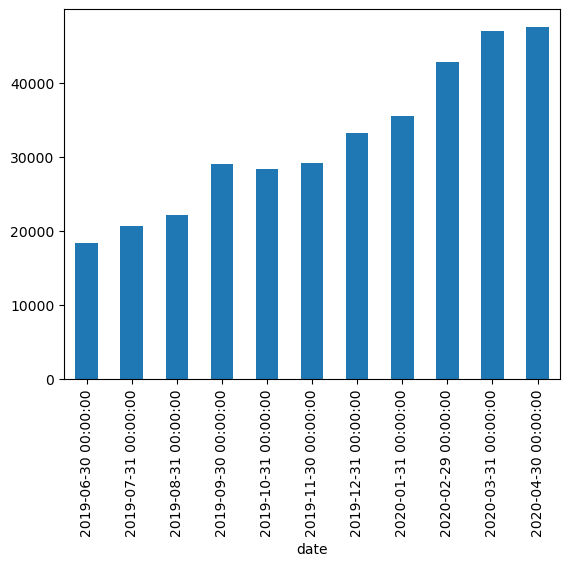

In [96]:
stock_df['Close'].resample('M').mean().plot(kind='bar')

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در این تمرین از شما می‌خواهیم ابتدا داده‌های ستون <code>Min</code> و <code>Max</code> را با نرخ ۱۰ روزه نمونه‌برداری کنید. سپس معاملاتی که در بازه‌های چهار ماهه‌ی آخر سال ۲۰۱۹ (یعنی از ۹-۲۰۱۹ تا ۱۲-۲۰۱۹) و سه ماهه‌ی اول سال ۲۰۲۰ (یعنی از ۱-۲۰۲۰ تا ۳-۲۰۲۰) هستند را فیلتر (استخراج) کنید و آن‌هایی که میانگین <code>Max</code> کمتر از ۳۵۰۰۰ و <code>Min</code> بیشتر از ۲۰۰۰۰ دارند را پیدا کنید.
</font>
</p>

In [97]:
result = stock_df[['Min','Max']].resample('10D').mean()
result = result["2019-9":"2020-3"]
result = result[(result['Min']>20000) & (result['Max'] < 35000)]
result

,Min,Max
date,,
2019-09-03,25513.802849,26337.174929
2019-09-13,28584.095449,29501.005236
2019-09-23,32993.918843,34038.522230
2019-10-03,29968.944497,30905.997154
2019-10-13,27654.362034,28598.031980
2019-10-23,24520.583274,25217.486180
2019-11-02,27563.924605,28337.823267
2019-11-12,28335.407980,29170.981678
2019-11-22,31614.932427,32420.005768


In [98]:
result

,Min,Max
date,,
2019-09-03,25513.802849,26337.174929
2019-09-13,28584.095449,29501.005236
2019-09-23,32993.918843,34038.522230
2019-10-03,29968.944497,30905.997154
2019-10-13,27654.362034,28598.031980
2019-10-23,24520.583274,25217.486180
2019-11-02,27563.924605,28337.823267
2019-11-12,28335.407980,29170.981678
2019-11-22,31614.932427,32420.005768


In [99]:
np.savez("answers.npz", index=result.index, values=result.values)

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
در انتها یک تست بسیار ساده از جواب نهایی که باید بفرستید انجام دهید.
</font>
</p>

In [100]:
res = np.load("answers.npz")
assert res["values"].shape == (12,2)
assert str(res["index"][0]) == '2019-09-03T00:00:00.000000000'

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
<b>سلول جواب‌ساز</b>
</font>
</h2>

<p dir=rtl style="direction: rtl; text-align: justify; line-height:200%; font-family:vazir; font-size:medium">
<font face="vazir" size=3>
    پس از ساخت دو فایل <code>answers.npz</code> و <code>formatted.csv</code> برای ساخته‌شدن فایل <code>result.zip</code> سلول زیر را اجرا کنید. توجه داشته باشید که پیش از اجرای سلول زیر تغییرات اعمال شده در نت‌بوک را ذخیره کرده باشید (<code>ctrl+s</code>) تا در صورت نیاز به راهنمایی امکان بررسی کد شما وجود داشته باشد.
</font>
</p>

In [101]:
import zlib
import zipfile


def compress(file_names):
    print("File Paths:")
    print(file_names)
    compression = zipfile.ZIP_DEFLATED
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["answers.npz", "formatted.csv", "iran_stock.ipynb"]
compress(file_names)

File Paths:
['answers.npz', 'formatted.csv', 'iran_stock.ipynb']
